<a href="https://colab.research.google.com/github/herrickc9614/geneticAlgorithm_SynthData/blob/main/geneticAlgorithm_SynthData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries Needed for Datasets
import numpy as np
import pandas as pd

#Used to Generate Random Numbers
import random

#Used to stop warnings from occuring, doesn't stop errors
import warnings
warnings.filterwarnings('ignore')

#Libraries Used For ML models
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE, RFECV, SequentialFeatureSelector

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.inspection import PartialDependenceDisplay

Loan Initialization

In [ ]:
#Library to install kaggle datasets
!pip install kagglehub
import kagglehub

#Anish Dev Edward
#https://www.kaggle.com/datasets/anishdevedward/loan-approval-dataset/data
path = kagglehub.dataset_download("anishdevedward/loan-approval-dataset")
df = pd.read_csv(f"{path}/loan_approval.csv")
df.drop_duplicates()
df.info()

Using Colab cache for faster access to the 'loan-approval-dataset' dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [ ]:
df["loan_approved"] = df["loan_approved"].astype(int)

X = df[['income', 'credit_score', 'loan_amount', 'years_employed', 'points']]
y = df[['loan_approved']]

#Scaled X for future use if needed
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Perform feature selection using the SelectPercentile function
model_percent = SelectPercentile(score_func=f_classif, percentile=65)
X_new_percent = model_percent.fit_transform(X, np.ravel(y))

# Get features selected by each function
filter_percent = model_percent.get_support()

# Get input feature names
features = np.array(X.columns)

X = X[features]

features[filter_percent]

array(['income', 'credit_score', 'points'], dtype=object)

Diabetes Initialization

In [ ]:
#Library to install kaggle datasets
!pip install kagglehub
import kagglehub

#Alex Teboul
#https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")
df = pd.read_csv(f"{path}/diabetes_012_health_indicators_BRFSS2015.csv")

df.drop_duplicates()
df.info()

Using Colab cache for faster access to the 'diabetes-health-indicators-dataset' dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost    

In [ ]:
X = df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
        'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
        'Sex', 'Age', 'Education', 'Income']]
y = df[['Diabetes_012']]

#Scaled X for future use if needed
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Perform feature selection using the SelectPercentile function
model_percent = SelectPercentile(score_func=f_classif, percentile=65)
X_new_percent = model_percent.fit_transform(X, np.ravel(y))

# Get features selected by each function
filter_percent = model_percent.get_support()

# Get input feature names
features = np.array(X.columns)

X = X[features]

features[filter_percent]

array(['HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Age', 'Education', 'Income'], dtype=object)

Divide the Dataset

In [ ]:
#Divides the Dataset into Testing, Training, and Validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1/(1-0.1), random_state=124)

Replace TrainingSet With Synthetic Data

Genetic Algorithm

In [ ]:
#Function for the genetic Algorithm
def genAlgorithm(par1, par2):
  child = []

  if(len(par1) == 1 and len(par2) == 1):
    prob = random.random()
    if(prob < .5):
      child.append(par1[0])
    else:
      child.append(par2[0])

  else:
    for genome1, genome2 in zip(par1, par2):
      prob = random.random()

      if(prob < .45):
        child.append(genome1)
      elif(prob < .9):
        child.append(genome2)
      else:
        if(genome1 > genome2):
          child.append(random.uniform(genome2, genome1))
        else:
          child.append(random.uniform(genome1, genome2))
  return child

gen_X = X_train
gen_Y = y_train
numToReplace = int(len(gen_X) * .5)

for _ in range(0, numToReplace):
  rand = random.randint(0, len(gen_X) - 1)
  gen_X = gen_X.drop(gen_X.index[rand])
  gen_Y = gen_Y.drop(gen_Y.index[rand])

for _ in range(0, numToReplace):
  randPar1 = randPar2 = random.randint(0, len(gen_X) - 1)

  while(randPar1 == randPar2):
    randPar2 = random.randint(0, len(gen_X) - 1)

  gen_X.loc[len(gen_X)] = genAlgorithm(gen_X.iloc[randPar1].tolist(), gen_X.iloc[randPar2].tolist())
  gen_Y.loc[len(gen_Y)] = genAlgorithm(gen_Y.iloc[randPar1].tolist(), gen_Y.iloc[randPar2].tolist())

Bootstrap Sampling

In [ ]:
#Bootstrap sampling
syn_X = X_train
syn_Y = y_train
numToReplace = int(len(syn_X) * .5)

for _ in range(0, numToReplace):
  rand = random.randint(0, len(syn_X) - 1)
  syn_X = syn_X.drop(syn_X.index[rand])
  syn_Y = syn_Y.drop(syn_Y.index[rand])

for _ in range(0, numToReplace):
  newEntry = []

  for col in syn_X.columns.tolist():
    newEntry.append(np.random.choice(syn_X[col]))

  syn_X.loc[len(syn_X)] = newEntry

  newEntry = []
  for col in syn_Y.columns.tolist():
    newEntry.append(np.random.choice(syn_Y[col]))
  syn_Y.loc[len(syn_Y)] = newEntry


Logistic Regression:

In [ ]:
# Create tuning grid
regModel = LogisticRegression()
params = {'penalty': [None, 'l1', 'l2'],
          'max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 500, 1000, 10000, 100000]}

# Initialize tuning grid and fit to training data
regTuning = GridSearchCV(regModel, params)
regTuning.fit(X_val, np.ravel(y_val))

print('Best estimator:', regTuning.best_estimator_)

Best estimator: LogisticRegression(max_iter=10, penalty=None)


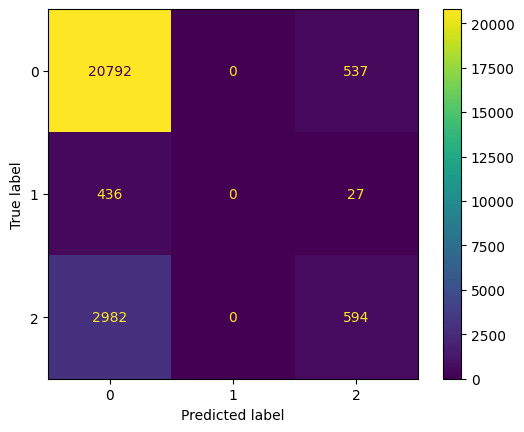

In [ ]:
#Unmodified Training
regModel = regTuning.best_estimator_
regModel.fit(X_train, y_train)
regModel.score(X_test, y_test)

y_pred = regModel.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("LR model accuracy:", metrics.accuracy_score(y_test, y_pred))
print("LR model precision:", metrics.precision_score(y_test, y_pred, average='micro'))
print("LR model recall:", metrics.recall_score(y_test, y_pred, average='micro'))
print("LR model kappa:", metrics.cohen_kappa_score(y_test, y_pred))

LR model accuracy: 0.8430305897193314
LR model precision: 0.8430305897193314
LR model recall: 0.8430305897193314
LR model kappa: 0.17886579869572683


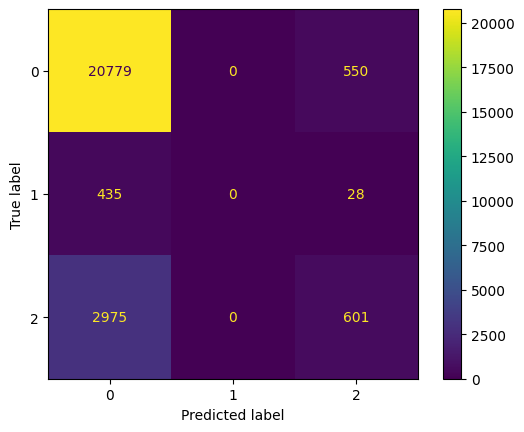

In [ ]:
#Genetic Algorithm Training
regModel = regTuning.best_estimator_
regModel.fit(gen_X, gen_Y)
regModel.score(X_test, y_test)

y_pred = regModel.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("LR model accuracy:", metrics.accuracy_score(y_test, y_pred))
print("LR model precision:", metrics.precision_score(y_test, y_pred, average='micro'))
print("LR model recall:", metrics.recall_score(y_test, y_pred, average='micro'))
print("LR model kappa:", metrics.cohen_kappa_score(y_test, y_pred))

LR model accuracy: 0.8427940712708925
LR model precision: 0.8427940712708925
LR model recall: 0.8427940712708925
LR model kappa: 0.180113216126353


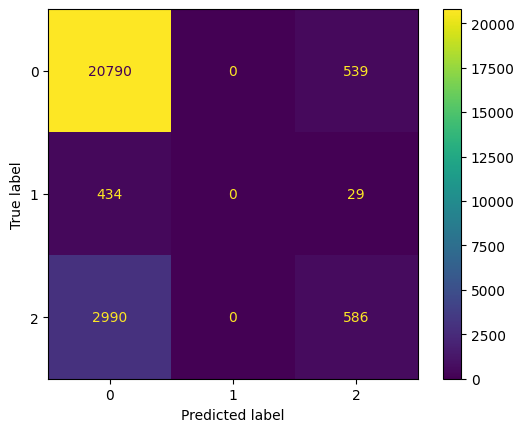

In [ ]:
#Synthetic Data Training
regModel = regTuning.best_estimator_
regModel.fit(syn_X, syn_Y)
regModel.score(X_test, y_test)

y_pred = regModel.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("LR model accuracy:", metrics.accuracy_score(y_test, y_pred))
print("LR model precision:", metrics.precision_score(y_test, y_pred, average='micro'))
print("LR model recall:", metrics.recall_score(y_test, y_pred, average='micro'))
print("LR model kappa:", metrics.cohen_kappa_score(y_test, y_pred))

LR model accuracy: 0.8426363923052664
LR model precision: 0.8426363923052664
LR model recall: 0.8426363923052664
LR model kappa: 0.17632822520852143


Decision Tree Classifier:

In [ ]:
# Create tuning grid
treeModel = DecisionTreeClassifier()
params = {'max_depth': [15, 16, 17, 18, 19, 20, 25],
          'min_samples_split': [10, 15, 20, 25, 30],
          'min_samples_leaf': [2, 3, 4, 5],
          'max_leaf_nodes': [70, 80, 90, 100]}

# Initialize tuning grid and fit to training data
treeTuning = GridSearchCV(treeModel, params)
treeTuning.fit(X_val, np.ravel(y_val))

print('Best estimator:', treeTuning.best_estimator_)

Best estimator: DecisionTreeClassifier(max_depth=15, max_leaf_nodes=70, min_samples_leaf=5,
                       min_samples_split=15)


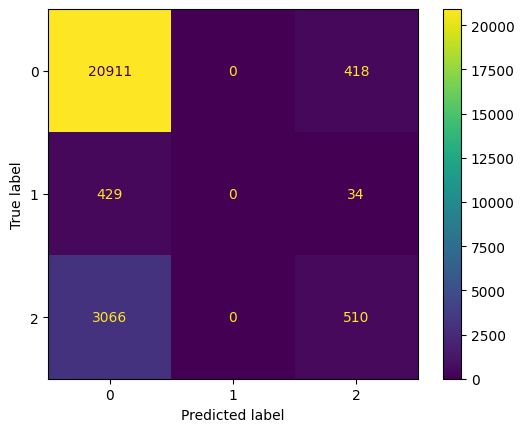

In [ ]:
#Unmodified Training
treeModel = treeTuning.best_estimator_
treeModel.fit(X_train, y_train)
treeModel.score(X_test, y_test)

y_pred = treeModel.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("Tree model accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Tree model precision:", metrics.precision_score(y_test, y_pred, average='micro'))
print("Tree model recall:", metrics.recall_score(y_test, y_pred, average='micro'))
print("Tree model kappa:", metrics.cohen_kappa_score(y_test, y_pred))

Tree model accuracy: 0.8444102806685588
Tree model precision: 0.8444102806685588
Tree model recall: 0.8444102806685588
Tree model kappa: 0.16239153878687607


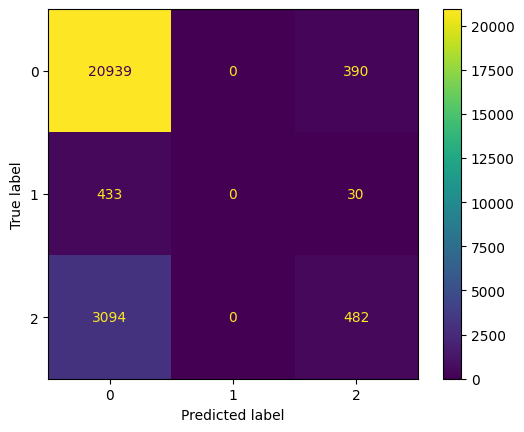

In [ ]:
#Genetic Algorithm Training
treeModel = treeTuning.best_estimator_
treeModel.fit(gen_X, gen_Y)
treeModel.score(X_test, y_test)

y_pred = treeModel.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("Tree model accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Tree model precision:", metrics.precision_score(y_test, y_pred, average='micro'))
print("Tree model recall:", metrics.recall_score(y_test, y_pred, average='micro'))
print("Tree model kappa:", metrics.cohen_kappa_score(y_test, y_pred))

Tree model accuracy: 0.8444102806685588
Tree model precision: 0.8444102806685588
Tree model recall: 0.8444102806685588
Tree model kappa: 0.15486077610013116


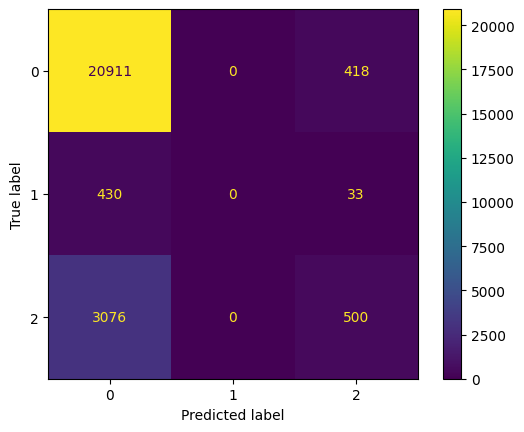

In [ ]:
#Synthetic Data Training
treeModel = treeTuning.best_estimator_
treeModel.fit(syn_X, syn_Y)
treeModel.score(X_test, y_test)

y_pred = treeModel.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("Tree model accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Tree model precision:", metrics.precision_score(y_test, y_pred, average='micro'))
print("Tree model recall:", metrics.recall_score(y_test, y_pred, average='micro'))
print("Tree model kappa:", metrics.cohen_kappa_score(y_test, y_pred))

Tree model accuracy: 0.8440160832544938
Tree model precision: 0.8440160832544938
Tree model recall: 0.8440160832544938
Tree model kappa: 0.15889535043752134


SVC:

In [ ]:
# Create tuning grid
svcModel = SVC()
params = {'max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
          'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Initialize tuning grid and fit to training data
svcTuning = GridSearchCV(svcModel, params)
svcTuning.fit(X_val, np.ravel(y_val))

print('Best estimator:', svcTuning.best_estimator_)

In [ ]:
#Unmodified Training
svcModel = svcTuning.best_estimator_
svcModel.fit(X_train, y_train)
svcModel.score(X_test, y_test)

y_pred = svcModel.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("SVC model accuracy:", metrics.accuracy_score(y_test, y_pred))
print("SVC model precision:", metrics.precision_score(y_test, y_pred, average='micro'))
print("SVC model recall:", metrics.recall_score(y_test, y_pred, average='micro'))
print("SVC model kappa:", metrics.cohen_kappa_score(y_test, y_pred))

In [ ]:
#Genetic Algorithm Training
svcModel = svcTuning.best_estimator_
svcModel.fit(gen_X, gen_Y)
svcModel.score(X_test, y_test)

y_pred = svcModel.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("SVC model accuracy:", metrics.accuracy_score(y_test, y_pred))
print("SVC model precision:", metrics.precision_score(y_test, y_pred, average='micro'))
print("SVC model recall:", metrics.recall_score(y_test, y_pred, average='micro'))
print("SVC model kappa:", metrics.cohen_kappa_score(y_test, y_pred))

In [ ]:
#Synthetic Data Training
svcModel = svcTuning.best_estimator_
svcModel.fit(syn_X, syn_Y)
svcModel.score(X_test, y_test)

y_pred = svcModel.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("SVC model accuracy:", metrics.accuracy_score(y_test, y_pred))
print("SVC model precision:", metrics.precision_score(y_test, y_pred, average='micro'))
print("SVC model recall:", metrics.recall_score(y_test, y_pred, average='micro'))
print("SVC model kappa:", metrics.cohen_kappa_score(y_test, y_pred))